In [1]:
import re

import numpy as np
from numpy.random import default_rng
rng = default_rng()
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

import nltk
from nltk.corpus import stopwords
# nltk.download('wordnet
# nltk.download('punkt')
from wordcloud import WordCloud

# Read dataset

In [49]:
dataset = pd.read_csv("./data/SA-News.csv")
dataset.sample(5)

,published_date,title,text,url,source,fake
104,23-10-2021,Covid-19: More than 35 000 children vaccinated...,The Department of Health announced Friday had ...,https://www.news24.com//news24/southafrica/new...,news24.com,False
673,05-08-2020,"How China, the #CCPvirus and NASPERS Sent Sout...",The Rich Get Richer: Is it any wonder NASPERS ...,https://sa-news.com/how-china-the-ccpvirus-and...,sa-news.com,True
782,20-10-2021,Womandla! Female registered voters outnumber m...,A total of 3 111 930 people are registered to ...,https://www.news24.com//news24/southafrica/new...,news24.com,False
686,30-09-2021,Shutdown in Free State town: Nine protesters r...,The group was arrested for public violence dur...,https://www.news24.com//news24/southafrica/new...,news24.com,False
871,18-01-2019,Woman drives from Johannesburg to Durban to de...,Woman drives from Johannesburg to Durban to d...,https://www.mzansistories.com/2019/01/woman-dr...,mzansistories.com,True


# Investigate the dataset

**Plot the counts of real vs fake news**

Text(0.5, 1.0, 'Counts of real vs fake news')

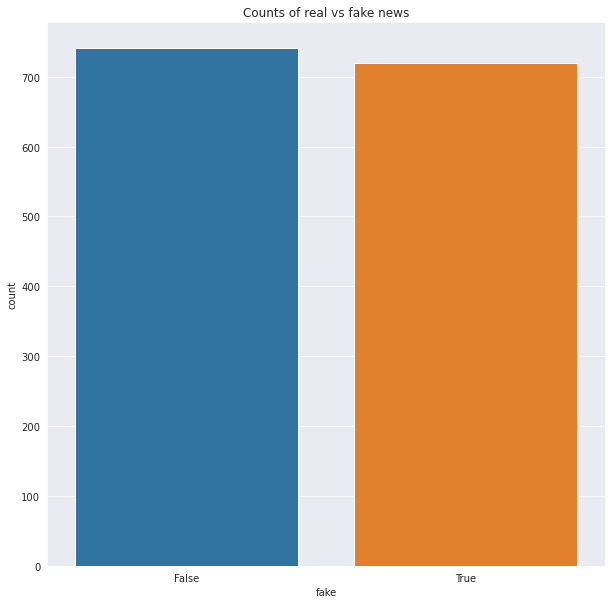

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x=dataset['fake'], ax=ax)
ax.set_title('Counts of real vs fake news')

We can thus see that the data is balanced

**Plot distribution of news across sources**

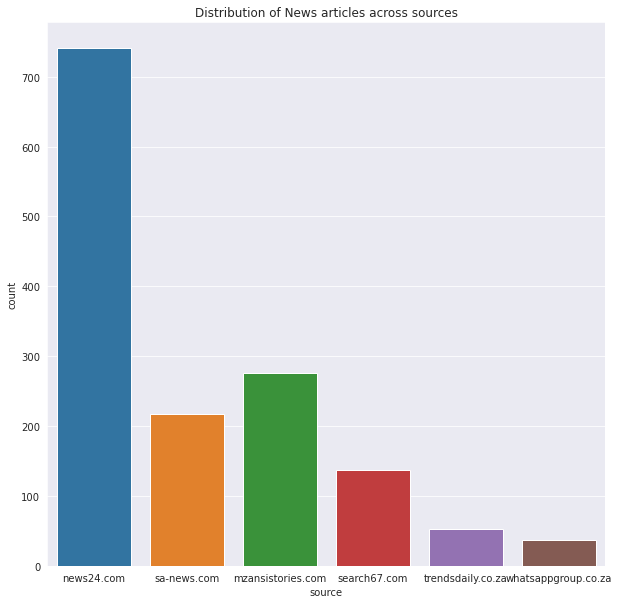

In [51]:
fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(x=dataset['source'], ax=ax)
ax.set_title('Distribution of News articles across sources')
fig.savefig('./plots/news_src_distribution.png')

There are 6 dataset sources. The largest number of news comes from News24.

**Plot of sources grouped by whether it has real or fake news**

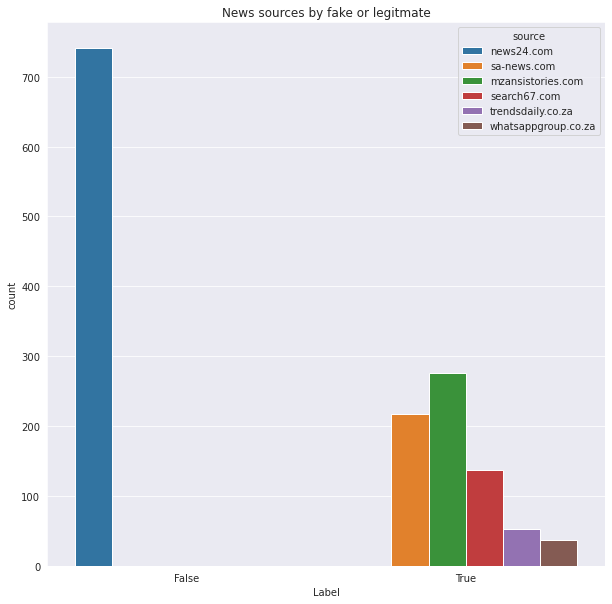

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(x='fake', hue='source', data=dataset, ax=ax)
ax.set_title('News sources by fake or legitmate')
ax.set_xlabel('Label')
fig.savefig('./plots/sources_dist_by_label.png')

Here we can see that all of the real news comes from News24 and the rest of the sources are the fake news

**Wordcloud of the most frequent words in the text of the fake news articles**

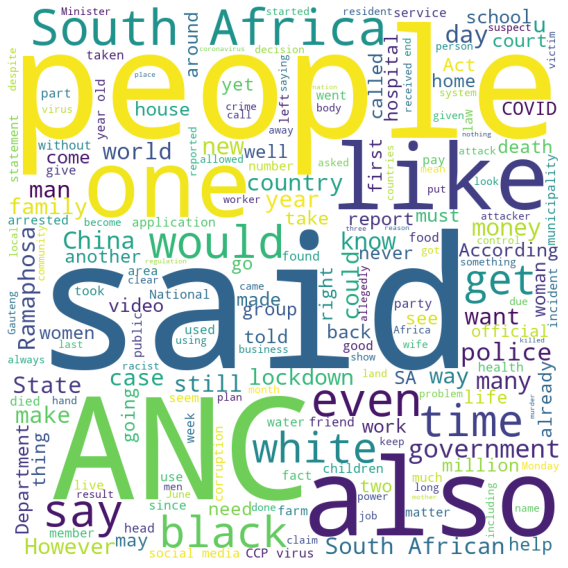

In [55]:
wordcloud_fake = WordCloud(width=800, height=800, background_color='white',
                     stopwords=stopwords.words('english'),
                     min_font_size=10).generate("".join(dataset[dataset['fake']== True].text))

#  Plot the word coloud
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(wordcloud_fake)
ax.axis('off')
plt.tight_layout()
plt.show()
fig.savefig('./images/wordcloud_fake_news.png')

**Wordcloud of the most frequent words in the text of the real news articles**

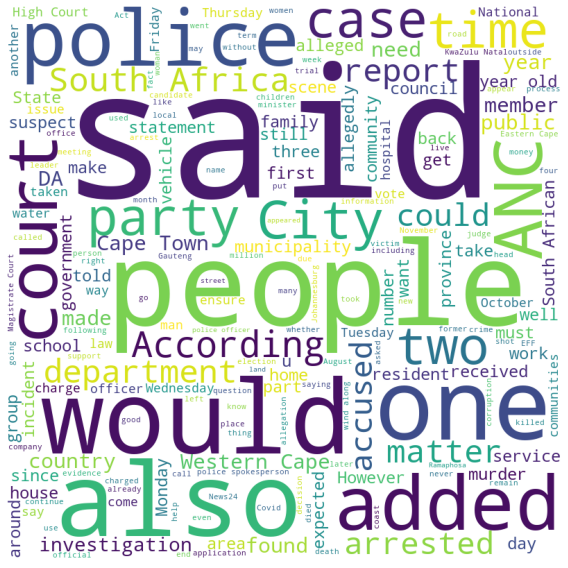

In [56]:
wordcloud_real = WordCloud(width=800, height=800, background_color='white',
                     stopwords=stopwords.words('english'),
                     min_font_size=10).generate("".join(dataset[dataset['fake']== False].text))

#  Plot the word coloud
fig,ax = plt.subplots(figsize=(8,8))
ax.imshow(wordcloud_real)
ax.axis('off')
plt.tight_layout()
plt.show()
fig.savefig('./images/wordcloud_real_news.png')

**Length Anaylsis**

In [58]:
dataset['word_count'] = dataset['text'].apply(lambda x: len(str(x).split(" ")))
dataset['char_count'] = dataset['text'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
dataset['sent_count'] = dataset['text'].apply(lambda x: len(str(x).split(".")))

total_words = dataset['word_count'].sum()
print(f'Total words in the dataset: {total_words}')

Total words in the dataset: 535595


In [59]:
dataset.head(5)

,published_date,title,text,url,source,fake,word_count,char_count,sent_count
0,10-08-2021,Western Cape ramping up efforts against illega...,Fritz said the Western Cape liquor authorities...,https://www.news24.com//news24/southafrica/new...,news24.com,False,321,1802,18
1,10-10-2021,Limpopo crime intelligence cop killed during r...,A 58-year-old member of the Limpopo police's C...,https://www.news24.com//news24/southafrica/new...,news24.com,False,117,590,7
2,27-02-2020,For 21 Years ANC Promised Flagstaff Running Wa...,The residents of the Eastern Cape town of Flag...,https://sa-news.com/for-21-years-anc-promised-...,sa-news.com,True,312,1538,12
3,22-05-2018,"My dad touches me, this is how he does it","My dad touches me, this is how he does it Dear...",https://www.mzansistories.com/2018/05/my-dad-t...,mzansistories.com,True,121,482,9
4,08-05-2018,Shocking: Details of Akhumzi Jeziles horrifyin...,Details of Akhumzi Jeziles horrifying car cras...,https://www.mzansistories.com/2018/05/shocking...,mzansistories.com,True,238,1026,22


**See if there is any correlation between lengths and whether news is real or fake**

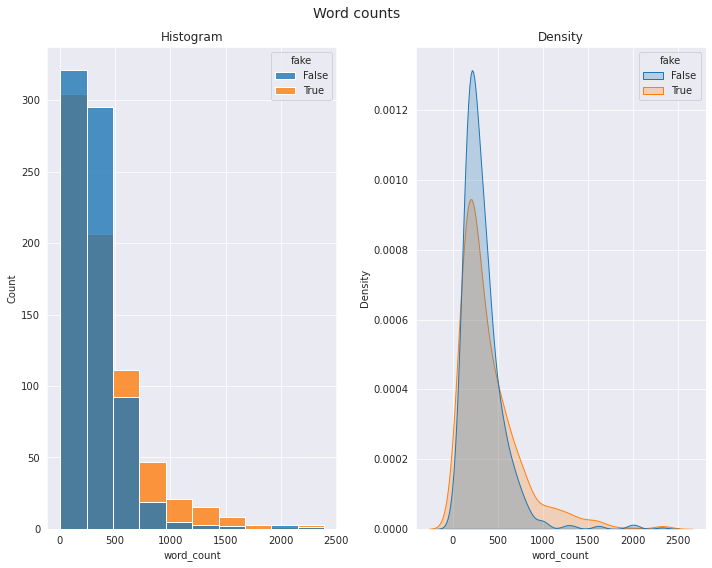

In [60]:
fig,ax = plt.subplots(figsize=(10,8),nrows=1,ncols=2)
fig.suptitle('Word counts', fontsize=14)
    
sns.histplot(data=dataset, x='word_count',hue='fake',alpha=0.8,bins=10,ax=ax[0])
sns.kdeplot(data=dataset, x='word_count',hue='fake',shade=True,ax=ax[1])

ax[0].set_title('Histogram')
ax[0].grid(True)
ax[1].set_title('Density')
ax[1].grid(True)
plt.tight_layout()
plt.show()
fig.savefig('./plots/word_counts_dist.png')

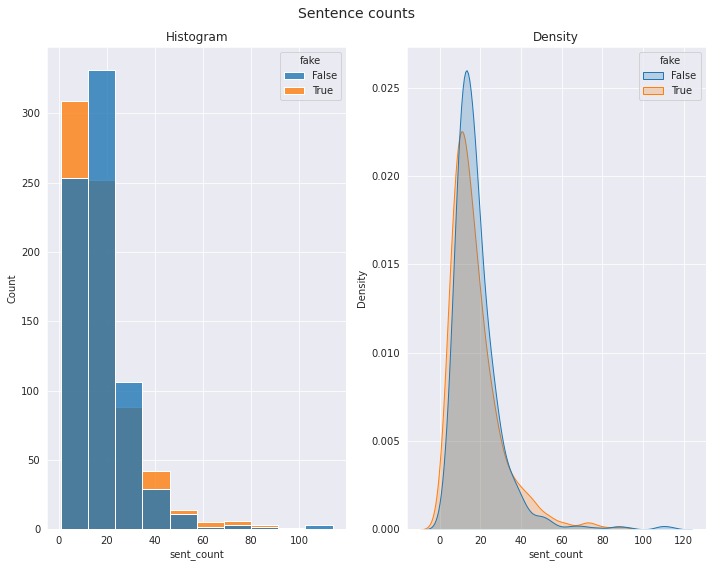

In [61]:
fig,ax = plt.subplots(figsize=(10,8),nrows=1,ncols=2)
fig.suptitle('Sentence counts', fontsize=14)
    
sns.histplot(data=dataset, x='sent_count',hue='fake',alpha=0.8,bins=10,ax=ax[0])
sns.kdeplot(data=dataset, x='sent_count',hue='fake',shade=True,ax=ax[1])

ax[0].set_title('Histogram')
ax[0].grid(True)
ax[1].set_title('Density')
ax[1].grid(True)
plt.tight_layout()
plt.show()
fig.savefig('./plots/sent_counts_dist.png')

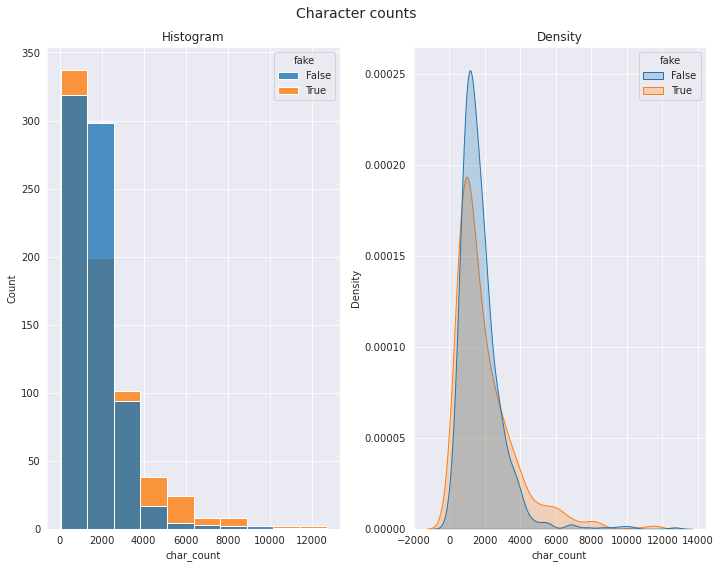

In [62]:
fig,ax = plt.subplots(figsize=(10,8),nrows=1,ncols=2)
fig.suptitle('Character counts', fontsize=14)
    
sns.histplot(data=dataset, x='char_count',hue='fake',alpha=0.8,bins=10,ax=ax[0])
sns.kdeplot(data=dataset, x='char_count',hue='fake',shade=True,ax=ax[1])

ax[0].set_title('Histogram')
ax[0].grid(True)
ax[1].set_title('Density')
ax[1].grid(True)
plt.tight_layout()
plt.show()
fig.savefig('./plots/char_counts_dist.png')

# Text preprocessing

Create a clean corpus to use

**Drop unneccessary columns and merge title and text columns**

In [13]:
dataset['text'] = dataset['title'] + " " + dataset['text']

dataset = dataset.drop(['published_date', 'title', 'url', 'source'], axis=1)
dataset.head(5)

,text,fake,word_count,char_count,sent_count
0,Western Cape ramping up efforts against illega...,False,321,1802,18
1,Limpopo crime intelligence cop killed during r...,False,117,590,7
2,For 21 Years ANC Promised Flagstaff Running Wa...,True,312,1538,12
3,"My dad touches me, this is how he does it My d...",True,121,482,9
4,Shocking: Details of Akhumzi Jeziles horrifyin...,True,238,1026,22


**Text cleaning**

In [14]:
def preprocess_text(text, use_stemm=False):
    
    # Clean text
    clean_text = re.sub(r'[^\w\s]','', str(text).lower().strip())
    
    # Tokenise
    clean_text_lst = clean_text.split()
    
    # Remove stopwords
    lst_stopwords = nltk.corpus.stopwords.words('english')
    clean_text_lst = [word for word in clean_text_lst if word not in lst_stopwords]
    
    # Stemming/Lemmatisation
    if use_stemm:
        stemm = nltk.stem.porter.PorterStemmer()
        clean_text_lst = [ stemm.stem(word) for word in clean_text_lst ]
    else:
        lemm = nltk.stem.wordnet.WordNetLemmatizer()
        clean_text_lst = [ lemm.lemmatize(word) for word in clean_text_lst ]
        
    # List to string
    final_clean_text = " ".join(clean_text_lst)
    return final_clean_text
    

In [15]:
dataset['clean_text'] = dataset['text'].apply(lambda text: preprocess_text(text))
dataset.head()

,text,fake,word_count,char_count,sent_count,clean_text
0,Western Cape ramping up efforts against illega...,False,321,1802,18,western cape ramping effort illegal shebeen un...
1,Limpopo crime intelligence cop killed during r...,False,117,590,7,limpopo crime intelligence cop killed robbery ...
2,For 21 Years ANC Promised Flagstaff Running Wa...,True,312,1538,12,21 year anc promised flagstaff running water e...
3,"My dad touches me, this is how he does it My d...",True,121,482,9,dad touch dad touch dear mizzb 16 bunked schoo...
4,Shocking: Details of Akhumzi Jeziles horrifyin...,True,238,1026,22,shocking detail akhumzi jeziles horrifying car...


In [16]:
print('After cleaning text:')
print(f"{dataset['text'].iloc[0][0:150]} ==> {dataset['clean_text'].iloc[0][0:150]}")

After cleaning text:
Western Cape ramping up efforts against illegal shebeens and underage drinking Fritz said the Western Cape liquor authorities have been clamping down  ==> western cape ramping effort illegal shebeen underage drinking fritz said western cape liquor authority clamping illegal shebeen underage drinking prov


# Word frequency

In [17]:
corpus_real = dataset[dataset['fake']==False]['clean_text']
tokens_real = nltk.tokenize.word_tokenize(corpus_real.str.cat(sep=" "))

corpus_fake = dataset[dataset['fake']==True]['clean_text']
tokens_fake = nltk.tokenize.word_tokenize(corpus_fake.str.cat(sep=" "))

In [67]:
def plot_freq_graphs(tokens,title,top=10, fig_title=None):
    
    # Unigram
    words_freq_1 = nltk.FreqDist(tokens)
    corpus_uni = pd.DataFrame(words_freq_1.most_common(), columns=["Word","Freq"])
    sorted_corpus_uni = corpus_uni.iloc[:top,:].sort_values(by='Freq',ascending=False)
    
    # Bigram
    word_freq_2 = nltk.FreqDist(nltk.ngrams(tokens, 2))
    corpus_bi = pd.DataFrame(word_freq_2.most_common(), columns=["Word","Freq"])
    corpus_bi["Word"] = corpus_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
    sorted_corpus_bi = corpus_bi.iloc[:top,:].sort_values(by='Freq',ascending=False)
    
    
    fig, axes = plt.subplots(figsize=(10,8),nrows=1, ncols=2)
    fig.suptitle(title, fontsize=16)
    
    sns.barplot(x='Freq',y='Word',data=sorted_corpus_uni, ax=axes[0])
    sns.barplot(x='Freq', y='Word', data=sorted_corpus_bi, ax=axes[1])
    
    plt.tight_layout()
    
    if fig_title:
        fig.savefig(fig_title)

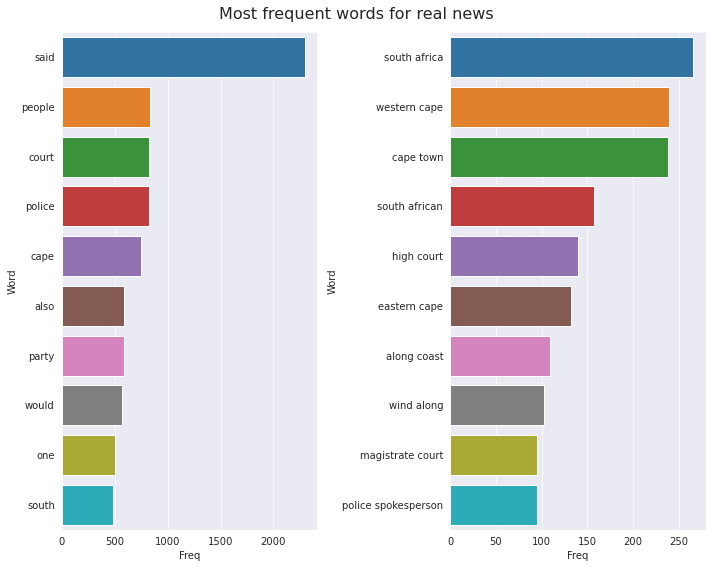

In [68]:
plot_freq_graphs(tokens_real,'Most frequent words for real news',fig_title='./plots/freq_words_real_news.png')

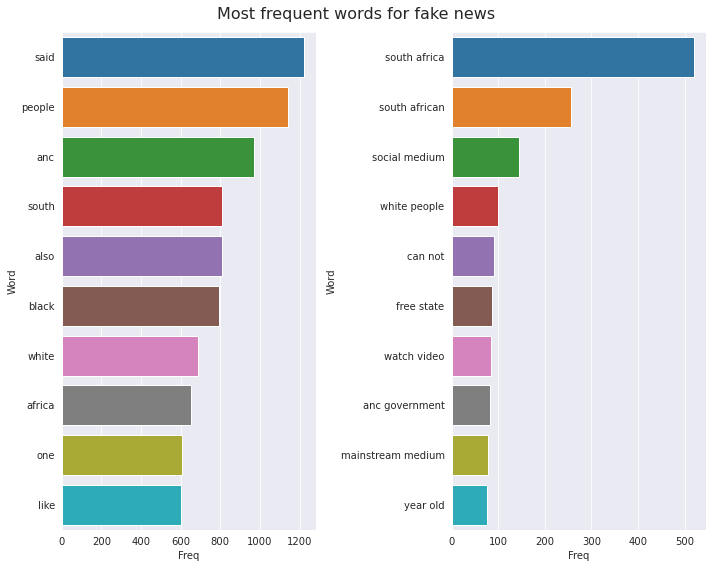

In [69]:
plot_freq_graphs(tokens_fake,'Most frequent words for fake news',fig_title='./plots/freq_words_fake_news.png')

# Split data

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dataset['clean_text'],dataset['fake'],
                                                test_size=0.2, random_state=1)
print(f'X: Training set {X_train.shape}, Testing set {X_test.shape}')
print(f'y: Training set {y_train.shape}, Testing set {y_test.shape}')

X: Training set (1168,), Testing set (292,)
y: Training set (1168,), Testing set (292,)


# 1. Naive Bayes Classifier

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

nb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tf-idf', TfidfTransformer()),
    ('classifier', MultinomialNB())    
])

model = nb_pipeline.fit(X_train, y_train)
prediction = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)

## 1.2 Evaluate Performance

In [35]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
# from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

acc_score = metrics.accuracy_score(y_test, prediction)
auc = metrics.roc_auc_score(y_test, predicted_prob[:, 1])
report = metrics.classification_report(y_test, prediction)

print(f'Accuracy: {int(round(acc_score,2)*100)}%')
print(f'AUC: {round(auc,2)}')
print(report)

Accuracy: 89%
AUC: 0.95
              precision    recall  f1-score   support

       False       0.89      0.89      0.89       150
        True       0.88      0.89      0.88       142

    accuracy                           0.89       292
   macro avg       0.89      0.89      0.89       292
weighted avg       0.89      0.89      0.89       292



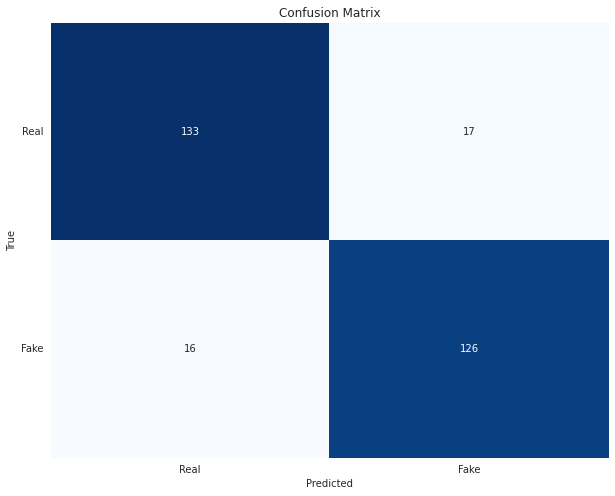

In [70]:
# Confustion Matrix
cm = metrics.confusion_matrix(y_test, prediction)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_xticklabels(['Real', 'Fake'])
ax.set_yticklabels(['Real', 'Fake'])
ax.set_title('Confusion Matrix')
plt.yticks(rotation=0)
fig.savefig('./plots/nb_confusion_matrix.png')

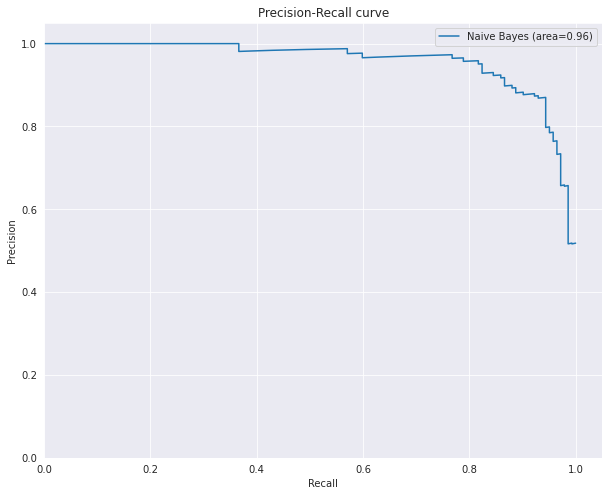

In [71]:
fig, ax = plt.subplots(figsize=(10,8))
precision, recall, thresh = metrics.precision_recall_curve(y_test,predicted_prob[:,1])
ax.plot(recall, precision,label=f'Naive Bayes (area={round(metrics.auc(recall, precision),2)})')
ax.set_xlim([0.0,1.05])
ax.set_ylim([0.0,1.05])
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall curve')
ax.legend(loc='best')
ax.grid(True)
plt.show()
fig.savefig('./plots/nb_prec_rec_curve.png')

## 1.2 Explainability

In [77]:
obs = rng.integers(0, len(X_test))

In [78]:
classify = lambda x: 'Fake News' if x else 'Real News'

# Random observation
print(f'Observation: {obs}')
obs_exam = X_test.iloc[obs]
print(f'True value: {classify(y_test.iloc[obs])} ==> Pred value: {classify(prediction[obs])} and Prob: {np.round( np.max(predicted_prob[obs]) , 2)}')


# Explaination
from lime import lime_text

explainer = lime_text.LimeTextExplainer(class_names=['Real','Fake'])
explained = explainer.explain_instance(obs_exam, model.predict_proba, num_features=3)
explained.show_in_notebook(text=obs_exam, predict_proba=False)

Observation: 152
True value: Real News ==> Pred value: Real News and Prob: 0.93


# 2. Naive Bayes Classifier (without common frequent words)

I will retrain the classifier but this time without any of the common bigrams between fake and real news.

## 2.1 Remove Frequent words

In [27]:
def frequent_grams(tokens,top=10):
    
    # Unigram
    words_freq_1 = nltk.FreqDist(tokens)
    corpus_uni = pd.DataFrame(words_freq_1.most_common(), columns=["Word","Freq"])
    sorted_corpus_uni = corpus_uni.iloc[:top,:].sort_values(by='Freq',ascending=False)
    
    # Bigram
    word_freq_2 = nltk.FreqDist(nltk.ngrams(tokens, 2))
    corpus_bi = pd.DataFrame(word_freq_2.most_common(), columns=["Word","Freq"])
    corpus_bi["Word"] = corpus_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
    sorted_corpus_bi = corpus_bi.iloc[:top,:].sort_values(by='Freq',ascending=False)
    
    return sorted_corpus_uni['Word'].to_numpy(), sorted_corpus_bi['Word'].to_numpy()

In [28]:
real_uni, real_bi = frequent_grams(tokens_real)
fake_uni, fake_bi = frequent_grams(tokens_fake)

common_uni = np.intersect1d(real_uni,fake_uni)
print('Common unigrams: ',common_uni)
common_bi = np.intersect1d(real_bi,fake_bi)
print('Common bigrams: ',common_bi)

words_to_remove =np.unique( np.concatenate([common_uni, np.array([x.split(" ") for x in common_bi]).ravel()]) )
print('Words to remove: ',words_to_remove)

Common unigrams:  ['also' 'one' 'people' 'said' 'south']
Common bigrams:  ['south africa' 'south african']
Words to remove:  ['africa' 'african' 'also' 'one' 'people' 'said' 'south']


In [29]:
# Remove the words
remove_words = lambda text: " ".join([word for word in text.split() if word not in words_to_remove])

dataset['clean_text_without_freq_words'] = dataset['clean_text'].apply(lambda text: remove_words(text))
dataset.head()

,text,fake,word_count,char_count,sent_count,clean_text,clean_text_without_freq_words
0,Western Cape ramping up efforts against illega...,False,321,1802,18,western cape ramping effort illegal shebeen un...,western cape ramping effort illegal shebeen un...
1,Limpopo crime intelligence cop killed during r...,False,117,590,7,limpopo crime intelligence cop killed robbery ...,limpopo crime intelligence cop killed robbery ...
2,For 21 Years ANC Promised Flagstaff Running Wa...,True,312,1538,12,21 year anc promised flagstaff running water e...,21 year anc promised flagstaff running water e...
3,"My dad touches me, this is how he does it My d...",True,121,482,9,dad touch dad touch dear mizzb 16 bunked schoo...,dad touch dad touch dear mizzb 16 bunked schoo...
4,Shocking: Details of Akhumzi Jeziles horrifyin...,True,238,1026,22,shocking detail akhumzi jeziles horrifying car...,shocking detail akhumzi jeziles horrifying car...


## 2.2 Split data

In [30]:
X_train,X_test,y_train,y_test = train_test_split(dataset['clean_text_without_freq_words'],dataset['fake'],
                                                test_size=0.2, random_state=1)
print(f'X: Training set {X_train.shape}, Testing set {X_test.shape}')
print(f'y: Training set {y_train.shape}, Testing set {y_test.shape}')

X: Training set (1168,), Testing set (292,)
y: Training set (1168,), Testing set (292,)


## 2.3 Multinomial Naive Bayes Classifier

In [31]:
model2 = nb_pipeline.fit(X_train, y_train)
prediction2 = model2.predict(X_test)
predicted_prob2 = model2.predict_proba(X_test)

## 2.4 Evaluate Performance

In [32]:
acc_score2 = metrics.accuracy_score(y_test, prediction2)
auc2 = metrics.roc_auc_score(y_test, predicted_prob2[:, 1])

print(f'Accuracy: {int(round(acc_score2,2)*100)}%')
print(f'AUC: {round(auc2,2)}')

Accuracy: 88%
AUC: 0.95


# Save Dataset

In [33]:
# df = dataset.drop(dataset.columns[[2,3,4]],axis=1)
# df.to_csv('corpus.csv', index=False)